# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows - 1 points

In [191]:
#Import all the necessary modules
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

In [192]:
car_data = pd.read_csv('car-mpg-1.csv')
car_data.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis - 2 points

In [193]:
car_data.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [194]:
car_data.shape

(398, 9)

In [195]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary. - 1 points

In [196]:
temp = pd.DataFrame(car_data.hp.str.isdigit()) 

temp[temp['hp'] == False]   

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [197]:
car_data = car_data.replace('?', np.nan)

In [198]:
car_data.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [199]:
car_data = car_data.drop('car name', axis=1)

In [200]:
car_data = car_data.apply(lambda x: x.fillna(x.median()),axis=0)

In [201]:
car_data.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [202]:
car_data['hp'] = car_data['hp'].astype('float64')

In [203]:
car_data.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [204]:
car_data.isnull().values.any()

False

In [205]:
car_data.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences - 1 points

In [206]:
corr_value = car_data.corr()
corr_value

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


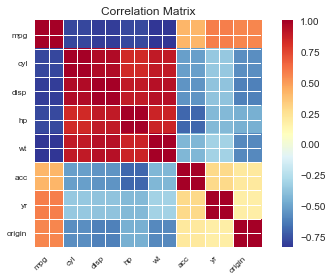

In [207]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_value, xnames=list(corr_value.columns))
plt.show()

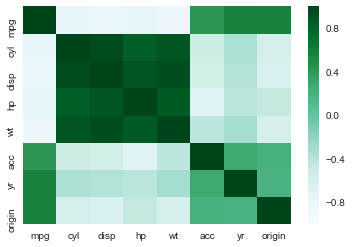

In [208]:
sns.heatmap(car_data.corr(), cmap='BuGn')

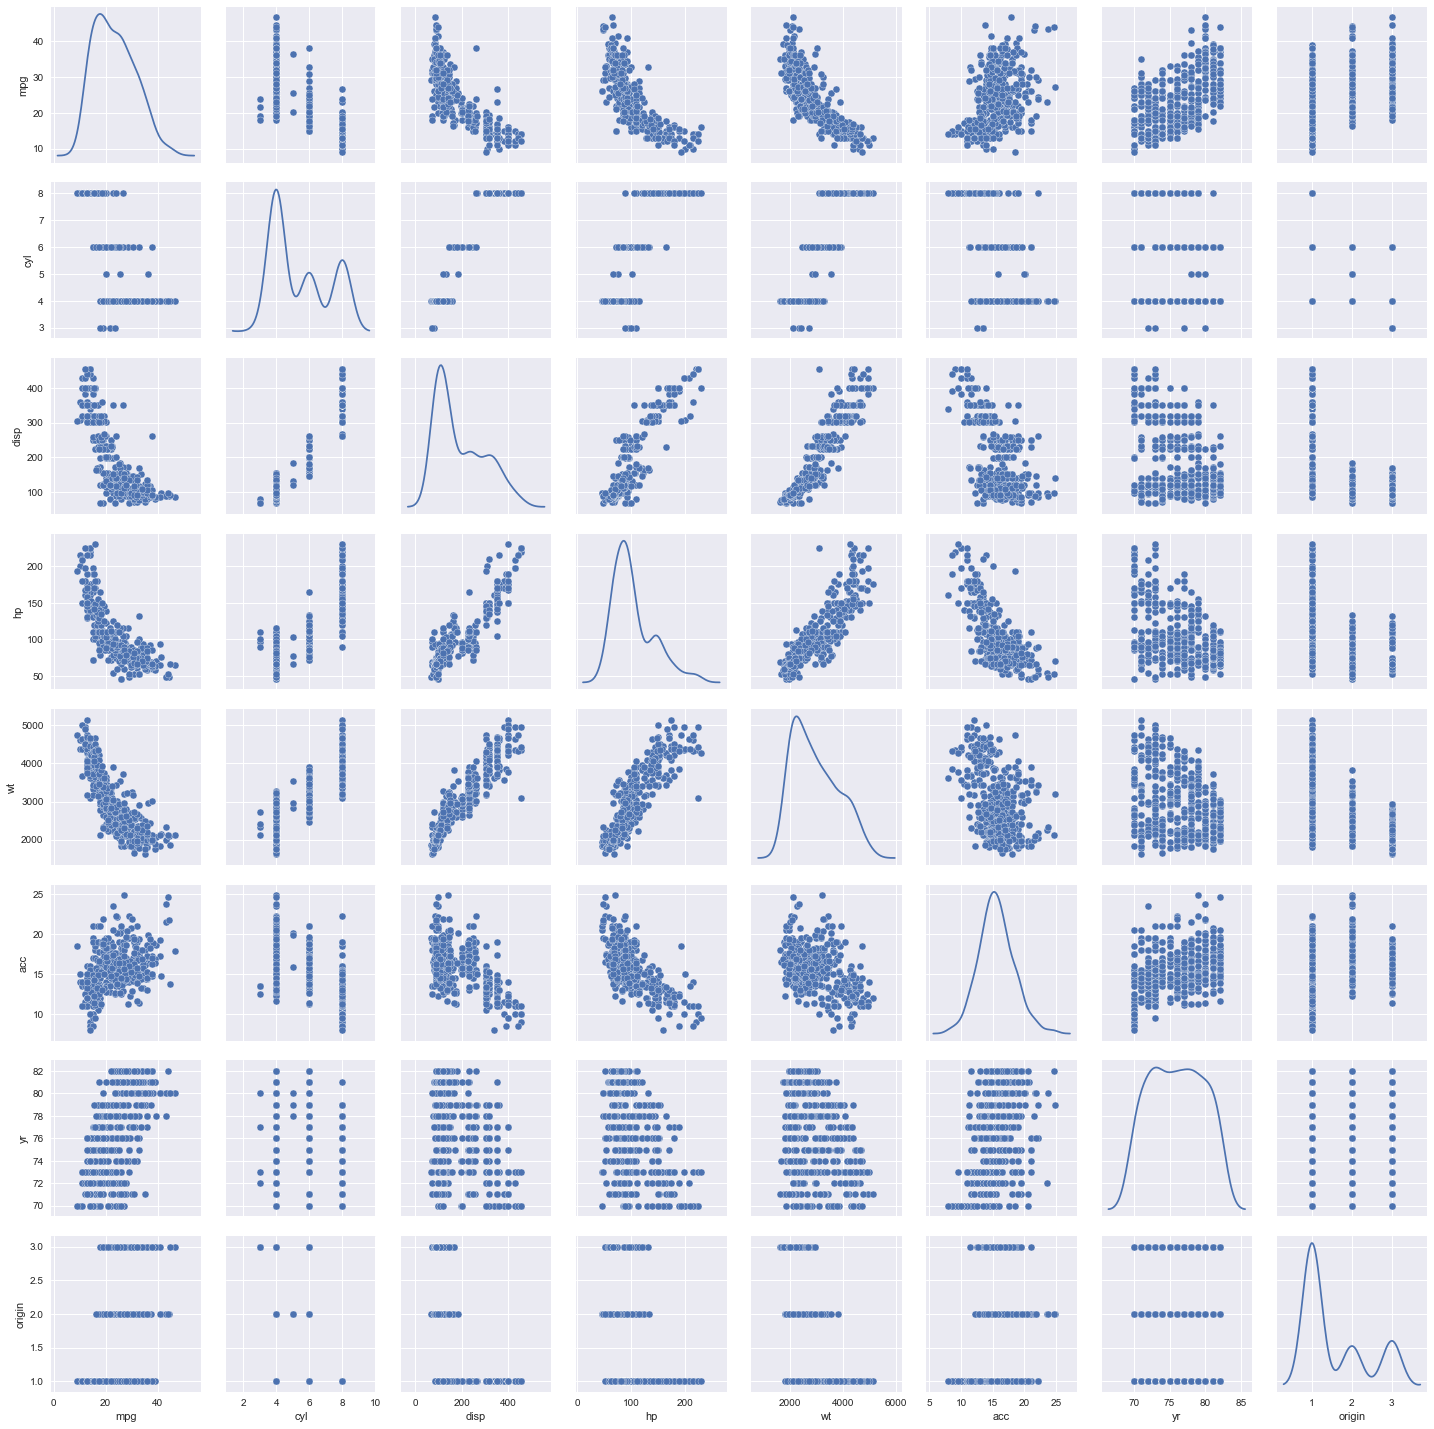

In [209]:
import seaborn as sns
sns.pairplot(car_data, diag_kind='kde')

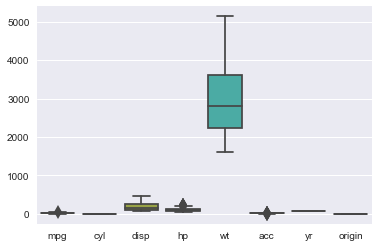

In [210]:
b = sns.boxplot(data = car_data,fliersize=10)

In [211]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(f'{fence_low}')
    print(f'{fence_high}')
    car_data_new = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return car_data_new
car_data_new=remove_outlier(car_data,'mpg')
car_data_new=remove_outlier(car_data_new,'cyl')
car_data_new=remove_outlier(car_data_new,'disp')
car_data_new=remove_outlier(car_data_new,'hp')
car_data_new=remove_outlier(car_data_new,'wt')
car_data_new=remove_outlier(car_data_new,'acc')
#car_data_new=remove_outlier(car_data_new,'yr')
car_data_new=remove_outlier(car_data_new,'origin')

0.25
46.25
-2.0
14.0
-130.5
497.5
2.5
198.5
264.375
5479.375
9.087499999999997
22.187500000000007
-0.5
3.5


From the pair plot i can infer that data has some mix in gaussians and I can around 3 to 4 peaks on average so I am expecting around 3 0r 4 clusters is optimal cluster size

Origin column has 3 peaks but if we try exploring the data from the pair plot it clearly shows that it is a categorical data with 3 dimentional levels so we need to perform one hot coding

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns - 1.5 points

In [212]:
car_data['origin'].values.any()

True

In [213]:
car_data = car_data.drop('yr', axis=1)

In [214]:
# Replace the numbers in categorical variables with the actual country names in the origin col
car_data['origin'] = car_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [215]:
car_data = pd.get_dummies(car_data, columns=['origin'])

In [216]:
car_data.head(5)

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers - 2 points

In [217]:
from scipy.stats import zscore

car_data_z = car_data.apply(zscore)

# Q7. Create appropriate clusters with the new data set - 2

In [218]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

In [219]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_data_z, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,Avg Sil Score,cluster_errors,num_clusters
0,0.412050,1879.838214,2
1,0.413965,1309.212745,3
2,0.516079,811.835437,4
3,0.489439,632.334649,5
4,0.480755,557.615756,6
5,0.453825,495.088108,7
6,0.413395,438.117491,8
7,0.389174,400.216544,9



# Q8. Identify the appropriate clusters with result from above question - 1.5 points

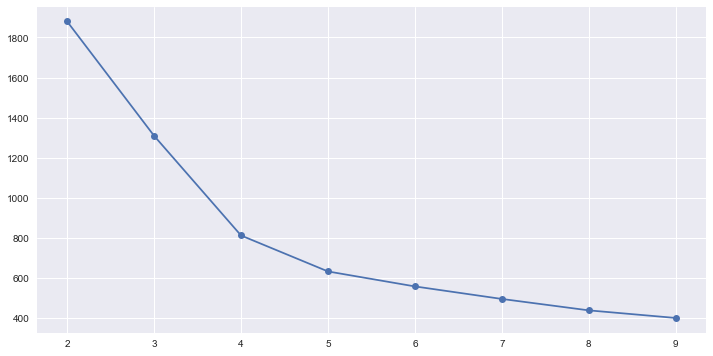

In [220]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [231]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(car_data_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables - 1 point

In [232]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[ -5.21968978e-01,   3.83722326e-01,   3.45956229e-01,
         -1.40862164e-01,   3.24153965e-01,   4.13877101e-01,
          7.73559031e-01,  -4.97643349e-01,  -4.61968218e-01,
          1.33226763e-15],
       [  5.60692611e-01,  -7.63821892e-01,  -8.09333810e-01,
         -6.12330272e-01,  -6.46889750e-01,   4.42612202e-01,
         -1.29272617e+00,  -4.97643349e-01,   2.16465108e+00,
          3.00000000e+00],
       [  8.88536858e-01,  -7.96712677e-01,  -8.71116725e-01,
         -6.40965256e-01,  -8.85808633e-01,   2.19321963e-01,
         -1.29272617e+00,   2.00947124e+00,  -4.61968218e-01,
          1.00000000e+00],
       [ -1.12726026e+00,   1.48641870e+00,   1.46865697e+00,
          1.47338845e+00,   1.36736404e+00,  -1.03371846e+00,
          7.73559031e-01,  -4.97643349e-01,  -4.61968218e-01,
          2.00000000e+00],
       [  5.73389248e-01,  -8.24502844e-01,  -6.39740891e-01,
         -5.84794713e-01,  -6.18740366e-01,   3.24618570e-01,
          7.73559031e-01

In [233]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(car_data_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,GROUP
0,-0.521969,0.383722,0.345956,-0.140862,0.324154,0.413877,0.773559,-0.497643,-0.461968,1.332268e-15
1,0.560693,-0.763822,-0.809334,-0.612330,-0.646890,0.442612,-1.292726,-0.497643,2.164651,3.000000e+00
2,0.888537,-0.796713,-0.871117,-0.640965,-0.885809,0.219322,-1.292726,2.009471,-0.461968,1.000000e+00
3,-1.127260,1.486419,1.468657,1.473388,1.367364,-1.033718,0.773559,-0.497643,-0.461968,2.000000e+00
4,0.573389,-0.824503,-0.639741,-0.584795,-0.618740,0.324619,0.773559,-0.497643,-0.461968,1.332268e-15


# Q10. Assign the groups created above to data frame and study the characteristics  for each group. - 2 points

In [234]:
prediction=cluster.predict(car_data_z)

In [235]:
#Append the prediction 

car_data_z["GROUP"] = prediction


In [236]:
car_data_z.groupby("GROUP").count()

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe
GROUP,,,,,,,,,
0,75,75,75,75,75,75,75,75,75
1,70,70,70,70,70,70,70,70,70
2,79,79,79,79,79,79,79,79,79
3,100,100,100,100,100,100,100,100,100
4,74,74,74,74,74,74,74,74,74


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187D47292E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000187D3C47E48>]], dtype=object)

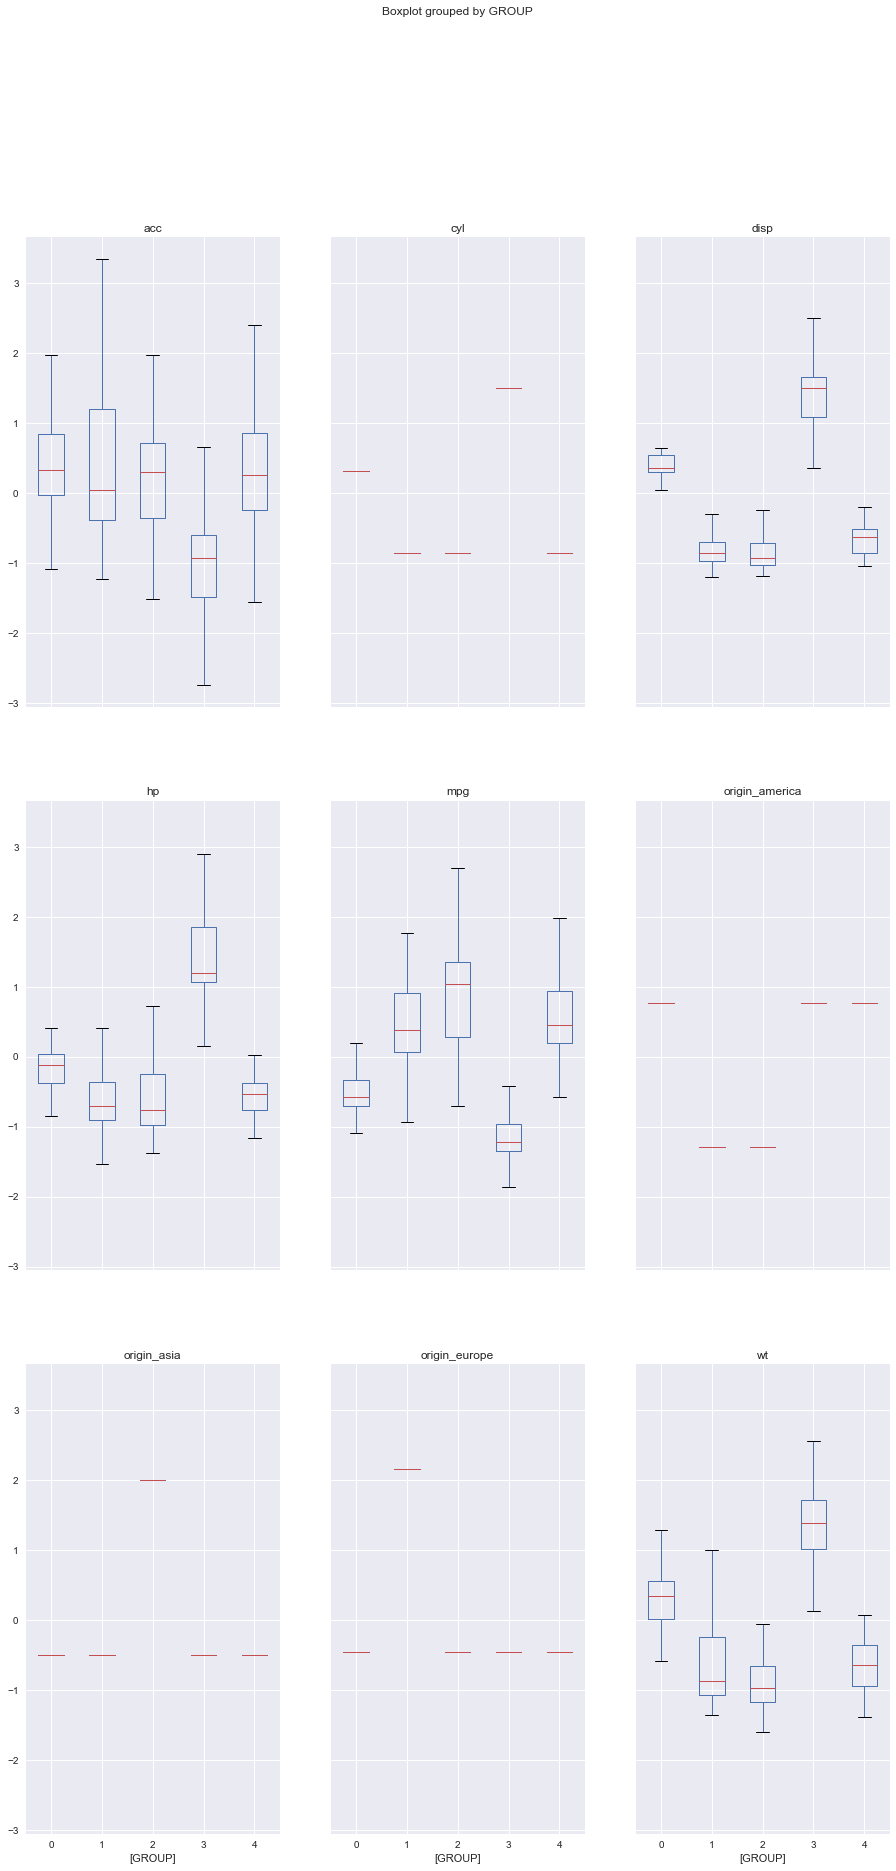

In [237]:
import matplotlib.pylab as plt

car_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

